# Global Earthquake Data

## Installations

In [1]:
# !pip3 install --upgrade pip

In [1]:
# %pip install geopandas
# %pip install tabulate

## Imports

In [15]:
import sys

from tabulate import tabulate
import numpy as np
import pandas as pd

import geopandas

from shapely.geometry import box, Point

import folium

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline

import contextily as cx

import mapclassify

## Display Imports & Their Versions

In [16]:
headers = ["Software/Library", "Version"]

table_data = [
    ['Python', sys.version[0:6]],
    ['NumPy', np.__version__],
    ['Pandas', pd.__version__],
    ['geopandas', geopandas.__version__],
    ['Folium', folium.__version__],
    ['Contextily', cx.__version__],
    ['Map Classify', mapclassify.__version__]
    ]

print(tabulate(table_data, headers=headers, tablefmt="grid"))

+--------------------+-----------+
| Software/Library   | Version   |
+====================+===========+
| Python             | 3.11.4    |
+--------------------+-----------+
| NumPy              | 1.26.4    |
+--------------------+-----------+
| Pandas             | 1.5.3     |
+--------------------+-----------+
| geopandas          | 1.0.1     |
+--------------------+-----------+
| Folium             | 0.19.4    |
+--------------------+-----------+
| Contextily         | 1.6.2     |
+--------------------+-----------+
| Map Classify       | 2.8.1     |
+--------------------+-----------+


## Import Dataset

In [17]:
df = geopandas.read_file("data/earthquakes.csv")

df

,id,magnitude,type,title,date,time,updated,url,detailUrl,felt,...,location,continent,country,subnational,city,locality,postcode,what3words,timezone,locationDetails
0,us7000necw,4.8,earthquake,"M 4.8 - 33 km WSW of Ackerly, Texas",2024-09-17T00:49:42,1726534182289,1726583895255,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,1893,...,"Ackerly, Texas",North America,United States of America (the),Texas,Tarzan-Lenorah,Tarzan-Lenorah,79783,landmass.perkily.affords,-300,"[{'id': '80684', 'wikidataId': '', 'name': '79..."
1,tx2024shcj,5.1,earthquake,"M 5.1 - 34 km WSW of Ackerly, Texas",2024-09-17T00:49:42,1726534182183,1726672002991,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,2042,...,"Ackerly, Texas",North America,United States of America (the),Texas,Tarzan-Lenorah,Tarzan-Lenorah,79331,escalator.grownups.dwell,-300,"[{'id': '89341', 'wikidataId': '', 'name': '48..."
2,ci40734823,3.7,earthquake,"M 3.7 - 6 km N of Malibu, CA",2024-09-16T11:22:08,1726485728190,1726637414586,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,1580,...,"Malibu, CA",North America,United States of America (the),California,Los Angeles,Agoura Hills-Malibu,90265,clocking.uploaded.issuer,-420,"[{'id': '93478', 'wikidataId': 'Q844837', 'nam..."
3,tx2024scvz,3.9,earthquake,"M 3.9 - 58 km S of Whites City, New Mexico",2024-09-14T17:01:06,1726333266539,1726584426218,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,5,...,"Whites City, New Mexico",North America,United States of America (the),Texas,Van Horn,Van Horn,,sailboats.sawn.speeding,-300,"[{'id': '9', 'wikidataId': 'Q49', 'name': 'Nor..."
4,us7000ndte,4.1,earthquake,"M 4.1 - 60 km S of Whites City, New Mexico",2024-09-14T17:01:06,1726333266382,1726334616179,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,4,...,"Whites City, New Mexico",North America,United States of America (the),Texas,Van Horn,Van Horn,,spinners.downtime.computes,-300,"[{'id': '9', 'wikidataId': 'Q49', 'name': 'Nor..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,us6000ldpm,6.3,earthquake,"M 6.3 - 25 km NNE of Zindah Jān, Afghanistan",2023-10-07T07:12:49,1696662769702,1702589215040,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,11,...,"Zindah Jān, Afghanistan",Asia,Afghanistan,Herat,Zindah Jan,Zendeh Jan District,,staked.radish.enduringly,270,"[{'id': '108', 'wikidataId': 'Q48', 'name': 'A..."
1133,us6000ldph,5.4,earthquake,"M 5.4 - 26 km NE of Zindah Jān, Afghanistan",2023-10-07T06:49:41,1696661381156,1702589215040,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,0,...,"Zindah Jān, Afghanistan",Asia,Afghanistan,Herat,Zindah Jan,Zendeh Jan District,,bloomers.wondrous.possibility,270,"[{'id': '108', 'wikidataId': 'Q48', 'name': 'A..."
1134,us6000ldpg,6.3,earthquake,"M 6.3 - 32 km NNE of Zindah Jān, Afghanistan",2023-10-07T06:41:03,1696660863327,1702589215040,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,19,...,"Zindah Jān, Afghanistan",Asia,Afghanistan,Herat,Zindah Jan,Zendeh Jan District,,outshone.freedmen.inequality,270,"[{'id': '108', 'wikidataId': 'Q48', 'name': 'A..."
1135,us6000lcgj,5.7,earthquake,"M 5.7 - 39 km NE of Dipayal, Nepal",2023-10-03T09:21:03,1696324863018,1702589211040,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,131,...,"Dipayal, Nepal",Asia,Nepal,Sudurpashchim,Jayaprithivi,JayaPrithvi-03,,investments.ticketholder.hopefulness,345,"[{'id': '87376', 'wikidataId': '', 'name': 'As..."


In [18]:
df.describe(include='all')

,id,magnitude,type,title,date,time,updated,url,detailUrl,felt,...,location,continent,country,subnational,city,locality,postcode,what3words,timezone,locationDetails
count,1137,1137,1137,1137,1137,1137,1137,1137,1137,1137,...,1137,1137,1137,1137,1137,1137,1137,1137,1137,1137
unique,602,86,1,586,576,602,495,602,602,139,...,270,9,32,101,168,224,58,602,28,401
top,us6000m0xm,5.4,earthquake,"M 5.5 - Izu Islands, Japan region",2024-08-03T17:24:28,1704093521584,1702589212040,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,0,...,"Whites City, New Mexico",North America,United States of America (the),,,Etc/GMT-9,,tunnel.dealerships.combating,-300,"[{'id': '9', 'wikidataId': 'Q49', 'name': 'Nor..."
freq,4,113,1137,12,8,4,32,4,4,369,...,98,446,423,421,463,121,940,4,214,60


### Return Information About Unqiue Values in Select Features

In [19]:
cols_to_check = [
    "id",
    "magnitude",
    "type",
    "title",
    "date",
    "time",
    "updated",
    "url",
    "detailUrl",
    "felt",
    "cdi",
    "mmi",
    "alert",
    "status",
    "tsunami",
    "sig",
    "net",
    "code",
    "ids",
    "sources",
    "types",
    "nst",
    "dmin",
    "rms",
    "gap",
    "magType",
    "geometryType",
    "depth",
    "latitude",
    "longitude",
    "place",
    "distanceKM",
    "placeOnly",
    "location",
    "continent",
    "country",
    "subnational",
    "city",
    "locality",
    "postcode",
    "what3words",
    "timezone",
    "locationDetails"
]

for col in cols_to_check:
    u_vals = np.sort(df[col].unique())
    if len(u_vals) < 600:
        print(f"{col} ({len(u_vals)})\n{u_vals}\n")
    else:
        print(f"{col} ({len(u_vals)})\n")

id (602)

magnitude (86)
['3' '3.01' '3.09' '3.1' '3.12' '3.14' '3.17' '3.2' '3.22' '3.23' '3.24'
 '3.29' '3.3' '3.31' '3.32' '3.35' '3.4' '3.43' '3.44' '3.45' '3.46'
 '3.47' '3.48' '3.5' '3.51' '3.56' '3.58' '3.59' '3.6' '3.61' '3.64'
 '3.66' '3.68' '3.7' '3.78' '3.8' '3.86' '3.9' '3.94' '4' '4.06' '4.09'
 '4.1' '4.2' '4.26' '4.28' '4.3' '4.39' '4.4' '4.44' '4.47' '4.5' '4.6'
 '4.69' '4.7' '4.8' '4.89' '4.9' '5' '5.06' '5.1' '5.2' '5.22' '5.3' '5.4'
 '5.5' '5.6' '5.7' '5.8' '5.9' '6' '6.1' '6.2' '6.3' '6.4' '6.5' '6.6'
 '6.7' '6.8' '6.9' '7' '7.1' '7.2' '7.4' '7.5' '7.6']

type (1)
['earthquake']

title (586)
['M 3.0 - 15 km S of Camarillo, CA'
 'M 3.0 - 16 km ENE of Goldfield, Nevada'
 'M 3.0 - 17 km ENE of Walker Lake, Nevada'
 'M 3.0 - 3 km SE of Yucaipa, CA' 'M 3.1 - 1 km SSE of Big Lake, Alaska'
 'M 3.1 - 10 km WSW of Susitna, Alaska'
 'M 3.1 - 14 km ESE of Beluga, Alaska'
 'M 3.1 - 21 km W of Rancho Palos Verdes, CA'
 'M 3.1 - 22 km SSE of Malibu, CA' 'M 3.1 - 3 km ENE of The Ge

### Clean Data

In [20]:
### convert commas to periods in 'sources' feature
df['sources'] =  df['sources'].replace(',', '.')

### Fill in blank values (or the blank space(s) that signify blank values)
df["postcode"] =  df["postcode"].replace('', '00000')
df["country"] =  df["country"].replace('', 'Not Listed')
df["continent"] =  df["continent"].replace('', 'Not Listed')
df["alert"] =  df["alert"].replace('', 'Not Listed')

### country: United States of America (the) -> 'USA'
df["country"] =  df["country"].replace('United States of America (the)', 'USA')
df["country"] =  df["country"].replace('Congo (the Democratic Republic of the)', 'Democratic Republic of Congo')
df["country"] =  df["country"].replace('Tanzania, the United Republic of', 'United Republic of Tanzania')
df["country"] =  df["country"].replace('Philippines (the)', 'Philippines')
df["country"] =  df["country"].replace('Iran (Islamic Republic of)', 'Islamic Republic of Iran')
df["country"] =  df["country"].replace('Bolivia (Plurinational State of)', 'Plurinational State of Bolivia')
df["country"] =  df["country"].replace('Viet Nam', 'Vietnam')

### convert from string to integers:
df["cdi"] =  df["cdi"].astype(int)
df["mmi"] =  df["mmi"].astype(int)
df["tsunami"] =  df["tsunami"].astype(int)
df["timezone"] =  df["timezone"].astype(int)
df["postcode"] =  df["postcode"].astype(int)
df["distanceKM"] =  df["distanceKM"].astype(int)
df["nst"] =  df["nst"].astype(int)
df["sig"] =  df["sig"].astype(int)
df["felt"] =  df["felt"].astype(int)

### convert from string to floating point:
df["magnitude"] =  df["magnitude"].astype(float)
df["dmin"] =  df["dmin"].astype(float)
df["rms"] =  df["rms"].astype(float)
df["gap"] =  df["gap"].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137 entries, 0 to 1136
Data columns (total 43 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1137 non-null   object 
 1   magnitude        1137 non-null   float64
 2   type             1137 non-null   object 
 3   title            1137 non-null   object 
 4   date             1137 non-null   object 
 5   time             1137 non-null   object 
 6   updated          1137 non-null   object 
 7   url              1137 non-null   object 
 8   detailUrl        1137 non-null   object 
 9   felt             1137 non-null   int64  
 10  cdi              1137 non-null   int64  
 11  mmi              1137 non-null   int64  
 12  alert            1137 non-null   object 
 13  status           1137 non-null   object 
 14  tsunami          1137 non-null   int64  
 15  sig              1137 non-null   int64  
 16  net              1137 non-null   object 
 17  code          

### Remove Select Features 

In [21]:
cols_to_remove = [
    "id",
    "type",
    "types",
    "url",
    "detailUrl",
    "geometryType",
    "locationDetails"
]

df.drop(columns=cols_to_remove, inplace=True)

df

,magnitude,title,date,time,updated,felt,cdi,mmi,alert,status,...,placeOnly,location,continent,country,subnational,city,locality,postcode,what3words,timezone
0,4.8,"M 4.8 - 33 km WSW of Ackerly, Texas",2024-09-17T00:49:42,1726534182289,1726583895255,1893,6,5,green,reviewed,...,"WSW of Ackerly, Texas","Ackerly, Texas",North America,USA,Texas,Tarzan-Lenorah,Tarzan-Lenorah,79783,landmass.perkily.affords,-300
1,5.1,"M 5.1 - 34 km WSW of Ackerly, Texas",2024-09-17T00:49:42,1726534182183,1726672002991,2042,6,5,green,reviewed,...,"WSW of Ackerly, Texas","Ackerly, Texas",North America,USA,Texas,Tarzan-Lenorah,Tarzan-Lenorah,79331,escalator.grownups.dwell,-300
2,3.7,"M 3.7 - 6 km N of Malibu, CA",2024-09-16T11:22:08,1726485728190,1726637414586,1580,4,4,Not Listed,reviewed,...,"N of Malibu, CA","Malibu, CA",North America,USA,California,Los Angeles,Agoura Hills-Malibu,90265,clocking.uploaded.issuer,-420
3,3.9,"M 3.9 - 58 km S of Whites City, New Mexico",2024-09-14T17:01:06,1726333266539,1726584426218,5,3,4,green,reviewed,...,"S of Whites City, New Mexico","Whites City, New Mexico",North America,USA,Texas,Van Horn,Van Horn,0,sailboats.sawn.speeding,-300
4,4.1,"M 4.1 - 60 km S of Whites City, New Mexico",2024-09-14T17:01:06,1726333266382,1726334616179,4,3,4,green,reviewed,...,"S of Whites City, New Mexico","Whites City, New Mexico",North America,USA,Texas,Van Horn,Van Horn,0,spinners.downtime.computes,-300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,6.3,"M 6.3 - 25 km NNE of Zindah Jān, Afghanistan",2023-10-07T07:12:49,1696662769702,1702589215040,11,9,8,orange,reviewed,...,"NNE of Zindah Jān, Afghanistan","Zindah Jān, Afghanistan",Asia,Afghanistan,Herat,Zindah Jan,Zendeh Jan District,0,staked.radish.enduringly,270
1133,5.4,"M 5.4 - 26 km NE of Zindah Jān, Afghanistan",2023-10-07T06:49:41,1696661381156,1702589215040,0,0,7,yellow,reviewed,...,"NE of Zindah Jān, Afghanistan","Zindah Jān, Afghanistan",Asia,Afghanistan,Herat,Zindah Jan,Zendeh Jan District,0,bloomers.wondrous.possibility,270
1134,6.3,"M 6.3 - 32 km NNE of Zindah Jān, Afghanistan",2023-10-07T06:41:03,1696660863327,1702589215040,19,8,8,orange,reviewed,...,"NNE of Zindah Jān, Afghanistan","Zindah Jān, Afghanistan",Asia,Afghanistan,Herat,Zindah Jan,Zendeh Jan District,0,outshone.freedmen.inequality,270
1135,5.7,"M 5.7 - 39 km NE of Dipayal, Nepal",2023-10-03T09:21:03,1696324863018,1702589211040,131,8,7,green,reviewed,...,"NE of Dipayal, Nepal","Dipayal, Nepal",Asia,Nepal,Sudurpashchim,Jayaprithivi,JayaPrithvi-03,0,investments.ticketholder.hopefulness,345


### Rename Features as Needed

In [22]:
cols_to_rename = {
    "subnational": "regional",
    "postcode": "zip code",
    "date": "datetime",
    "time": "time_in_ms",
    "updated": "updated_time_in_ms",
    "felt": "num_of_ppl_who_felt_it",
    "tsunami": "risk_of_tsunami",
    "depth": "earthquake_depth_in_km",
    "magType": "type_of_magnitude",
    "rms": "rms_of_signal",
    "cdi": "comm_determined_intensity",
    "mmi": "mod_mercalli_intensity",
    "alert": "alert_level",
    "status": "event_status",
    "sig": "earthquake_significance",
    "net": "networkj_that_detected_it",
    "code": "network_assigned_code",
    "ids": "ids_of_related_events",
    "sources": "event_sources",
    "nst": "num_of_seismic_stations",
    "dmin": "min_dist_to_earthquake",
    "gap": "data_gap_bet_detect_stations",
    "place": "desc_of_event_location",
    "distanceKM": "dist_from_near_pop_place_in_km",
    "placeOnly": "is_location_info_avail",
    "location": "earthquake_full_address",
    "what3words": "unique_three_word_location_desc"
}

df.rename(columns=cols_to_rename, inplace=True)

df.head()

,magnitude,title,datetime,time_in_ms,updated_time_in_ms,num_of_ppl_who_felt_it,comm_determined_intensity,mod_mercalli_intensity,alert_level,event_status,...,is_location_info_avail,earthquake_full_address,continent,country,regional,city,locality,zip code,unique_three_word_location_desc,timezone
0,4.8,"M 4.8 - 33 km WSW of Ackerly, Texas",2024-09-17T00:49:42,1726534182289,1726583895255,1893,6,5,green,reviewed,...,"WSW of Ackerly, Texas","Ackerly, Texas",North America,USA,Texas,Tarzan-Lenorah,Tarzan-Lenorah,79783,landmass.perkily.affords,-300
1,5.1,"M 5.1 - 34 km WSW of Ackerly, Texas",2024-09-17T00:49:42,1726534182183,1726672002991,2042,6,5,green,reviewed,...,"WSW of Ackerly, Texas","Ackerly, Texas",North America,USA,Texas,Tarzan-Lenorah,Tarzan-Lenorah,79331,escalator.grownups.dwell,-300
2,3.7,"M 3.7 - 6 km N of Malibu, CA",2024-09-16T11:22:08,1726485728190,1726637414586,1580,4,4,Not Listed,reviewed,...,"N of Malibu, CA","Malibu, CA",North America,USA,California,Los Angeles,Agoura Hills-Malibu,90265,clocking.uploaded.issuer,-420
3,3.9,"M 3.9 - 58 km S of Whites City, New Mexico",2024-09-14T17:01:06,1726333266539,1726584426218,5,3,4,green,reviewed,...,"S of Whites City, New Mexico","Whites City, New Mexico",North America,USA,Texas,Van Horn,Van Horn,0,sailboats.sawn.speeding,-300
4,4.1,"M 4.1 - 60 km S of Whites City, New Mexico",2024-09-14T17:01:06,1726333266382,1726334616179,4,3,4,green,reviewed,...,"S of Whites City, New Mexico","Whites City, New Mexico",North America,USA,Texas,Van Horn,Van Horn,0,spinners.downtime.computes,-300


### Convert Pandas DataFrame to GeoPandas GeoDataFrame Convert Latitude & Longitude to 'geometry' Feature

In [23]:
gdf = geopandas.GeoDataFrame(
    df, 
    geometry=geopandas.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326"
)

gdf.drop(columns=["latitude", "longitude"], inplace=True)

gdf.head()

,magnitude,title,datetime,time_in_ms,updated_time_in_ms,num_of_ppl_who_felt_it,comm_determined_intensity,mod_mercalli_intensity,alert_level,event_status,...,earthquake_full_address,continent,country,regional,city,locality,zip code,unique_three_word_location_desc,timezone,geometry
0,4.8,"M 4.8 - 33 km WSW of Ackerly, Texas",2024-09-17T00:49:42,1726534182289,1726583895255,1893,6,5,green,reviewed,...,"Ackerly, Texas",North America,USA,Texas,Tarzan-Lenorah,Tarzan-Lenorah,79783,landmass.perkily.affords,-300,POINT (-102.044 32.3984)
1,5.1,"M 5.1 - 34 km WSW of Ackerly, Texas",2024-09-17T00:49:42,1726534182183,1726672002991,2042,6,5,green,reviewed,...,"Ackerly, Texas",North America,USA,Texas,Tarzan-Lenorah,Tarzan-Lenorah,79331,escalator.grownups.dwell,-300,POINT (-102.057 32.414)
2,3.7,"M 3.7 - 6 km N of Malibu, CA",2024-09-16T11:22:08,1726485728190,1726637414586,1580,4,4,Not Listed,reviewed,...,"Malibu, CA",North America,USA,California,Los Angeles,Agoura Hills-Malibu,90265,clocking.uploaded.issuer,-420,POINT (-118.807 34.0678)
3,3.9,"M 3.9 - 58 km S of Whites City, New Mexico",2024-09-14T17:01:06,1726333266539,1726584426218,5,3,4,green,reviewed,...,"Whites City, New Mexico",North America,USA,Texas,Van Horn,Van Horn,0,sailboats.sawn.speeding,-300,POINT (-104.45 31.647)
4,4.1,"M 4.1 - 60 km S of Whites City, New Mexico",2024-09-14T17:01:06,1726333266382,1726334616179,4,3,4,green,reviewed,...,"Whites City, New Mexico",North America,USA,Texas,Van Horn,Van Horn,0,spinners.downtime.computes,-300,POINT (-104.473 31.6323)


## Data Visualizations

### Non-Interactive Data Visualization

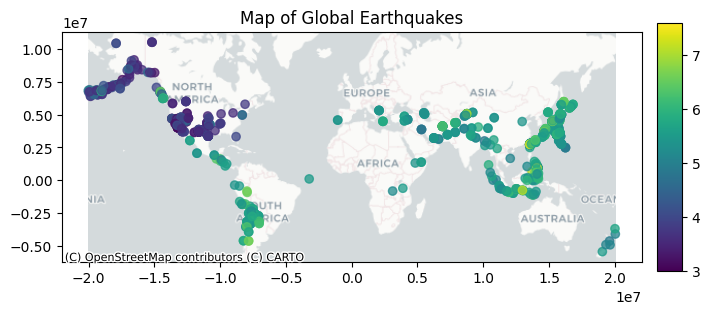

In [38]:
gdf_plot = gdf.to_crs(epsg=3857)

norm = mcolors.Normalize(vmin=np.min(gdf_plot['magnitude']), vmax=np.max(gdf_plot['magnitude']))

fig, ax = plt.subplots(figsize=(8, 24))
gdf_plot.plot(
    column='magnitude', 
    ax=ax, 
    alpha=0.75, 
    legend=True,
    norm=norm,
    legend_kwds={
        "shrink": 0.5,
        "aspect": 10,
        "pad": 0.025,
        "fraction": 0.04,
        "orientation": "vertical"
    }
    )

cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)

ax.set_title("Map of Global Earthquakes")

plt.show()

### Interactive Data Visualization

In [39]:
gdf.explore(
    m = folium.Map(
        location=[0, 0],
        tiles="OpenStreetMap", # "CartoDB Voyager", OpenStreetMap
        zoom_start=2,
        prefer_canvas=True
        ),
    popup=True,
    highlight=True,
    legend=True,
    control_scale=True,
    style_kwds = {
        'stroke': True,
        'color': '#3271a5',
        'weight': 0.50,
        'opacity': 0.75,
        'fill': True,
        'fillColor': '#b8e2f4',
        'fillOpacity': 0.20
    },
    highlight_kwds = {
        'stroke': True,
        'color': 'green',
        'weight': 5,
        'opacity': 1,
        'fill': True,
        'fillColor': '#88e788',
        'fillOpacity': 0.75
    }
)

## Methods & Attributes

### General Methods & attributes

In [ ]:
gdf.geom_type
gdf.get_geometry(index)

### Add Distance Features to Dataset

In [ ]:
# Use the Hardard address coordinates as the reference point for distances



gdf.distance(other[, align])
gdf.hausdorff_distance(other[, align, ...])
gdf.frechet_distance(other[, align, ...])

### Retrieve Coordinates

In [ ]:
gdf.x
gdf.y
gdf.z # how do I set this value to the altitude column???
gdf.get_coordinates(include_z=True)
gdf.count_coordinates()
gdf.count_geometries()

### Unary predicates

In [ ]:
gdf.is_simple
gdf.is_valid
gdf.is_valid_reason()
gdf.has_z

### Binary predicates

In [ ]:
gdf.contains(other[, align])
gdf.contains_properly(other[, align])

In [ ]:
gdf.crosses(other[, align])
gdf.disjoint(other[, align])

In [ ]:
gdf.dwithin(other, distance[, align])
gdf.geom_equals(other[, align])

In [ ]:
gdf.geom_almost_equals(other[, ...])
gdf.geom_equals_exact(other, tolerance)

In [ ]:
gdf.intersects(other[, align])
gdf.overlaps(other[, align])

In [ ]:
gdf.touches(other[, align])
gdf.within(other[, align])

In [ ]:
gdf.covers(other[, align])
gdf.covered_by(other[, align])

In [ ]:
gdf.relate(other[, align])
gdf.relate_pattern(other, pattern[, align])

### Set-Theoretic Methods

In [ ]:
gdf.clip_by_rect(xmin, ymin, xmax, ymax)
gdf.difference(other[, align])
gdf.intersection(other[, align])

In [ ]:
gdf.symmetric_difference(other[, align])
gdf.union(other[, align])

### Constructive methods and attributes

In [ ]:
gdf.boundary
gdf.buffer(distance[, resolution, ...])
gdf.centroid
gdf.concave_hull([ratio, allow_holes])
gdf.convex_hull
gdf.envelope
gdf.extract_unique_points()
gdf.force_2d()
gdf.force_3d([z])
gdf.make_valid()
gdf.minimum_bounding_circle()
gdf.minimum_clearance()
gdf.minimum_rotated_rectangle()
gdf.normalize()
gdf.remove_repeated_points([tolerance])
gdf.reverse()
gdf.sample_points(size[, method, ...])
gdf.segmentize(max_segment_length)
gdf.shortest_line(other[, align])
gdf.simplify(tolerance[, ...])
gdf.snap(other, tolerance[, align])
gdf.transform(transformation[, include_z])

### Affine transformations

In [ ]:
gdf.affine_transform(matrix)
gdf.rotate(angle[, origin, use_radians])
gdf.scale([xfact, yfact, zfact, origin])
gdf.skew([xs, ys, origin, use_radians])
gdf.translate([xoff, yoff, zoff])

### Linestring operations

In [ ]:
gdf.interpolate(distance[, normalized])
gdf.line_merge([directed])
gdf.project(other[, normalized, align])
gdf.shared_paths(other[, align])

### Aggregating and exploding

In [ ]:
gdf.build_area([node])
gdf.delaunay_triangles([tolerance, ...])
gdf.explode([ignore_index, index_parts])
gdf.intersection_all()
gdf.polygonize([node, full])
gdf.union_all([method])
gdf.voronoi_polygons([tolerance, ...])

### Spatial index

In [ ]:
gdf.sindex
gdf.has_sindex

### General Functions & Attributes (GeoDataFrame)

In [ ]:
gdf.rename_geometry(col[, inplace])
gdf.set_geometry(col[, drop, ...])
gdf.active_geometry_name

### Aggregating and exploding (GeoDataFrame)

In [ ]:
gdf.dissolve([by, aggfunc, ...])
gdf.explode([column, ignore_index, ...])

### Spatial joins

In [ ]:
gdf.sjoin(df, *args, **kwargs)
gdf.sjoin_nearest(right[, how, ...])

### Interface

In [ ]:
gdf.__geo_interface__

## Save Cleaned Dataset to File

In [ ]:
new_file_name_and_path = ''

gdf.to_file(new_file_name_and_path, driver="geojson")

### Resources Used (links to libraries used in this project)

- GeoPandas: https://geopandas.org/en/stable/
- GeoPy: https://geopy.readthedocs.io/en/stable/#
- PyPopulation: https://pypi.org/project/pypopulation/
- GeoText: https://pypi.org/project/geotext/
- ReverseGeocoder: https://pypi.org/project/reverse_geocoder/